# Compare IBM's influence on individuals inside/outdside IBM
Author: Daheng Wang  
Last updated: 2017-06-02

# Roadmap
1. Filter out retweets of IBM tweets
2. Aggregate retweet_count separately to IBM/non-IBM users
3. Get IBM users' IBM/non-IBM followers count
4. Plot IBM's influence to IBM/non-IBM users

# Steps

In [1]:
"""
Initialization
"""

'''
Data analysis modules: pandas, matplotlib, numpy, and etc.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # render double resolution plot output for Retina screens 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

'''
Standard modules, MongoDB modules
'''
import os, sys, json, datetime, pickle, multiprocessing, logging
from pprint import pprint

import pymongo
from pymongo import IndexModel, ASCENDING, DESCENDING

'''
Custom tool modules
'''
import mongodb  # module for setting up connection with (local) MongoDB database
import multiprocessing_workers  # module for splitting workloads between processes
import utilities  # module for various custom utility functions
from config import * # import all global configuration variables

'''
Misc
'''
NB_NAME = '20170507-compare_influence_inside_outside'

## Filter out retweets of IBM tweets

We define "IBM tweets" as native tweets posted by IBM users.  

**NOTE** we only consider IBM users of M1 (based on 'description field').  
We can only afford to query all followers information from Twitter API on the size of the IBM users of M1.

In [2]:
"""
Read in IBM users info
"""
if 1 == 1:
    user_nt_ibm_desc_ids_lst = []
    
    with open(USER_NT_IBM_DESC_IDS_LST_PKL, 'rb') as f:
        user_nt_ibm_desc_ids_lst = pickle.load(f)

In [4]:
"""
Filter out retweets of IBM tweets (multiprocessing) and write to intermediate files
"""
if 0 == 1:
    procedure_name = 'filter_{}_rt_ibm_tweets'.format(TW_RT_COL)
    
    multiprocessing.log_to_stderr(logging.DEBUG)
    process_n = multiprocessing.cpu_count() - 1 # set processes number to CPU numbers minus 1
    suffix = 'json'
    inter_files = utilities.gen_inter_filenames_list(NB_NAME, procedure_name, process_n, suffix)
    
    jobs = []
    for batch_i in range(process_n):
        
        p = multiprocessing.Process(target=multiprocessing_workers.worker_filter_rt_ibm_tweets,
                                    args=(DB_NAME, TW_RT_COL, batch_i, process_n, inter_files[batch_i], user_nt_ibm_desc_ids_lst),
                                    name='Process-{}/{}'.format(batch_i, process_n))
        jobs.append(p)
    
    for job in jobs:
        job.start()
        
    for job in jobs:
        job.join()

[INFO/Process-0/11] child process calling self.run()
[INFO/Process-0/11] child process calling self.run()
[INFO/Process-3/11] child process calling self.run()
[INFO/Process-1/11] child process calling self.run()
[INFO/Process-1/11] child process calling self.run()


MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!
MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!


[INFO/Process-3/11] child process calling self.run()
[INFO/Process-2/11] child process calling self.run()
[INFO/Process-4/11] child process calling self.run()
[INFO/Process-4/11] child process calling self.run()


MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!
MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!


[INFO/Process-5/11] child process calling self.run()


Process0/11 handling documents 0 to 529328...


[INFO/Process-2/11] child process calling self.run()
[INFO/Process-5/11] child process calling self.run()


MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!


[INFO/Process-6/11] child process calling self.run()


MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!


[INFO/Process-6/11] child process calling self.run()
[INFO/Process-7/11] child process calling self.run()
[INFO/Process-7/11] child process calling self.run()
[INFO/Process-8/11] child process calling self.run()


MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!
MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!


[INFO/Process-8/11] child process calling self.run()


MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!


[INFO/Process-9/11] child process calling self.run()
[INFO/Process-9/11] child process calling self.run()
[INFO/Process-10/11] child process calling self.run()


MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!


[INFO/Process-10/11] child process calling self.run()


MongoDB on localhost:27017/tweets_ek-2.tw_rt connected successfully!
Process1/11 handling documents 529329 to 1058657...
Process2/11 handling documents 1058658 to 1587986...
Process3/11 handling documents 1587987 to 2117315...
Process4/11 handling documents 2117316 to 2646644...
Process5/11 handling documents 2646645 to 3175973...
Process6/11 handling documents 3175974 to 3705302...
Process7/11 handling documents 3705303 to 4234631...
Process8/11 handling documents 4234632 to 4763960...
Process9/11 handling documents 4763961 to 5293289...
Process10/11 handling documents 5293290 to 5822626...


[INFO/Process-0/11] process shutting down
[INFO/Process-0/11] process shutting down
[DEBUG/Process-0/11] running all "atexit" finalizers with priority >= 0
[DEBUG/Process-0/11] running all "atexit" finalizers with priority >= 0
[DEBUG/Process-0/11] running the remaining "atexit" finalizers
[DEBUG/Process-0/11] running the remaining "atexit" finalizers
[INFO/Process-0/11] process exiting with exitcode 0
[INFO/Process-0/11] process exiting with exitcode 0
[INFO/Process-1/11] process shutting down
[INFO/Process-1/11] process shutting down
[DEBUG/Process-1/11] running all "atexit" finalizers with priority >= 0
[DEBUG/Process-1/11] running all "atexit" finalizers with priority >= 0
[DEBUG/Process-1/11] running the remaining "atexit" finalizers
[DEBUG/Process-1/11] running the remaining "atexit" finalizers
[INFO/Process-1/11] process exiting with exitcode 0
[INFO/Process-1/11] process exiting with exitcode 0
[INFO/Process-2/11] process shutting down
[INFO/Process-2/11] process shutting down


In [4]:
"""
Build a new collection for retweets of IBM tweets

Register in config:
    TW_RT_IBM_TW_COL = 'tw_rt_ibm_tw'
"""
if 0 == 1:
    '''
    Generate the names of the intermediate files
    '''
    procedure_name = 'filter_{}_rt_ibm_tweets'.format(TW_RT_COL)
    process_n = multiprocessing.cpu_count() - 1 # set processes number to CPU numbers minus 1
    suffix = 'json'
    inter_files = utilities.gen_inter_filenames_list(NB_NAME, procedure_name, process_n, suffix)
        
    tw_rt_ibm_tw_col = mongodb.initialize(db_name=DB_NAME, collection_name=TW_RT_IBM_TW_COL)
    for inter_file in inter_files:
        print('Reading {}...'.format(inter_file), end=' ')
        lines = open(inter_file).readlines()
        parsed_jsons = [json.loads(line) for line in lines]
        print('Importing into {}.{}...'.format(DB_NAME, TW_RT_IBM_TW_COL))
        tw_rt_ibm_tw_col.insert_many(parsed_jsons)
    print('Done')

MongoDB on localhost:27017/tweets_ek-2.tw_rt_ibm_tw connected successfully!
Reading ./tmp/20170507-compare_influence_inside_outside-filter_tw_rt_rt_ibm_tweets-0.json... Importing into tweets_ek-2.tw_rt_ibm_tw...
Reading ./tmp/20170507-compare_influence_inside_outside-filter_tw_rt_rt_ibm_tweets-1.json... Importing into tweets_ek-2.tw_rt_ibm_tw...
Reading ./tmp/20170507-compare_influence_inside_outside-filter_tw_rt_rt_ibm_tweets-2.json... Importing into tweets_ek-2.tw_rt_ibm_tw...
Reading ./tmp/20170507-compare_influence_inside_outside-filter_tw_rt_rt_ibm_tweets-3.json... Importing into tweets_ek-2.tw_rt_ibm_tw...
Reading ./tmp/20170507-compare_influence_inside_outside-filter_tw_rt_rt_ibm_tweets-4.json... Importing into tweets_ek-2.tw_rt_ibm_tw...
Reading ./tmp/20170507-compare_influence_inside_outside-filter_tw_rt_rt_ibm_tweets-5.json... Importing into tweets_ek-2.tw_rt_ibm_tw...
Reading ./tmp/20170507-compare_influence_inside_outside-filter_tw_rt_rt_ibm_tweets-6.json... Importing into 

In [ ]:
"""
Build index
"""
if 0 == 1:
    tw_rt_ibm_tw_col.create_index([('user.id', pymongo.ASCENDING)])
    print('Done')

In [6]:
"""
Check new collection
"""
if 0 == 1:
    print('{} docs in new col'.format(tw_rt_ibm_tw_col.count()))
    # check if all cascade tweets are retweet tweets
    doc = tw_rt_ibm_tw_col.find_one(filter={'retweeted_status': {'$exists': False}})
    pprint(doc)

134327 docs in new col
None


## Aggregate retweet_count separately to IBM/non-IBM users

### Tag out IBM users among authors of retweets on IBM tweets (based on 'description' field)

In [2]:
user_tw_rt_ibm_tw_ibm_ids_lst_pickle = os.path.join(TMP_DIR, '{}-{}'.format(NB_NAME, 'user_tw_rt_ibm_tw_ibm_ids.lst.pickle'))
user_tw_rt_ibm_tw_nonibm_ids_lst_pickle = os.path.join(TMP_DIR, '{}-{}'.format(NB_NAME, 'user_tw_rt_ibm_tw_nonibm_ids.lst.pickle'))

In [3]:
"""
Tag out IBM users among authors of retweets on IBM tweets (based on 'description' field)
"""
if 0 == 1:
    """
    Get all authors information of retweets on IBM tweets (based on TW_RT_IBM_TW_COL)
    """
    tw_rt_ibm_tw_col = mongodb.initialize(db_name=DB_NAME, collection_name=TW_RT_IBM_TW_COL)
    cursor = tw_rt_ibm_tw_col.find(projection={'_id': 0, 'user': 1})
    
    """
    Tag each author whether the keyword 'ibm' appears in the user's 'description' field
    """
    keyword = 'ibm'
    user_tw_rt_ibm_tw_ibm_ids_set = set()
    user_tw_rt_ibm_tw_nonibm_ids_set = set()
    
    for doc in cursor:
        user_tw_rt_ibm_tw_id = int(doc['user']['id'])
        user_tw_rt_ibm_tw_desc = doc['user']['description']
        if utilities.simple_test_keyword_in_text(user_tw_rt_ibm_tw_desc, keyword):
            user_tw_rt_ibm_tw_ibm_ids_set.add(user_tw_rt_ibm_tw_id)
        else:
            user_tw_rt_ibm_tw_nonibm_ids_set.add(user_tw_rt_ibm_tw_id)
    
    """
    Pickle taged IBM/non-IBM authors of retweets on IBM tweets
    """
    print('Dumping IBM authors of retweets on IBM tweets: {}'.format(len(user_tw_rt_ibm_tw_ibm_ids_set)))
    with open(user_tw_rt_ibm_tw_ibm_ids_lst_pickle, 'wb') as f:
        pickle.dump(list(user_tw_rt_ibm_tw_ibm_ids_set), f)
    
    print('Dumping non-IBM authors of retweets on IBM tweets: {}'.format(len(user_tw_rt_ibm_tw_nonibm_ids_set)))
    with open(user_tw_rt_ibm_tw_nonibm_ids_lst_pickle, 'wb') as f:
        pickle.dump(list(user_tw_rt_ibm_tw_nonibm_ids_set), f)

MongoDB on localhost:27017/tweets_ek-2.tw_rt_ibm_tw connected successfully!
Dumping IBM users of retweets of IBM tweets: 4760
Dumping non-IBM users of retweets of IBM tweets: 31367


In [5]:
"""
Check results
"""
if 0 == 1:
    user_nt_ibm_desc_ids_lst = []

    with open(USER_NT_IBM_DESC_IDS_LST_PKL, 'rb') as f:
        user_nt_ibm_desc_ids_lst = pickle.load(f)

    user_tw_rt_ibm_tw_ibm_ids_lst = []

    with open(user_tw_rt_ibm_tw_ibm_ids_lst_pickle, 'rb') as f:
        user_tw_rt_ibm_tw_ibm_ids_lst = pickle.load(f)

    print('M1 IBM users: {}'.format(len(user_nt_ibm_desc_ids_lst)))
    print("IBM authors of retweets on M1 IBM users' tweets: {}".format(len(user_tw_rt_ibm_tw_ibm_ids_lst)))
    
    unknown_ibm_user_ids_set = set(user_tw_rt_ibm_tw_ibm_ids_lst).difference(set(user_nt_ibm_desc_ids_lst))
    print('Unknown IBM authros of retweets of M1 IBM users: {}'.format(len(unknown_ibm_user_ids_set)))

M1 IBM users: 6271
IBM authors of retweets of M1 IBM users: 4760
Unknown IBM authros of retweets of M1 IBM users: 1592


### Aggregate retweet_count on individual 'retweeted native IBM tweets' first, then on individual M1 IBM users

In [3]:
'''
Pickle for IBM cascade to all users reweet_count
'''
ibm_cascade_all_pkl = os.path.join(TMP_DIR, '{}-{}'.format(NB_NAME, 'ibm_cascade_all.lst.pkl'))

'''
Pickle for IBM cascade to IBM users reweet_count
'''
ibm_cascade_ibm_pkl = os.path.join(TMP_DIR, '{}-{}'.format(NB_NAME, 'ibm_cascade_ibm.lst.pkl'))

'''
Pickle for pickle for IBM cascade to non-IBM users reweet_count
'''
ibm_cascade_nonibm_pkl = os.path.join(TMP_DIR, '{}-{}'.format(NB_NAME, 'ibm_cascade_nonibm.lst.pkl'))

In [4]:
"""
Aggregate IBM cascade to all users
"""
TMP_COL = 'tmp'
if 0 == 1:
    """
    Clean 'tmp' collection if necessary
    """
    db = mongodb.initialize_db(db_name=DB_NAME)
    if TMP_COL in db.collection_names():
        print('"{}" collection already exists. Drop...'.format(TMP_COL))
        db[TMP_COL].drop()
    
    """
    Aggregate retweet_count on individual 'retweeted native IBM tweets' first
    Write to tmp collection
    """
    group_dict = {'$group': {'_id': '$retweeted_status.id', # group by id of 'retweeted native IBM tweets'
                             'all_rt_count': {'$sum': 1}, # aggregate retweet_count of each 'retweeted native IBM tweet' on all users
                             'user_id': {'$first': '$retweeted_status.user.id'}, # get author's id of each 'retweeted native IBM tweet'
                             'user_followers_count': {'$first': '$retweeted_status.user.followers_count'} # get author's followers number of each 'retweeted native IBM tweet'
                             }}
    project_dict = {'$project': {'_id': 0,
                                'id': '$_id',
                                'all_rt_count': 1,
                                'user_id': 1,
                                'user_followers_count': 1}}
    out_dic = {'$out': TMP_COL}
    
    ppl_lst = [group_dict, project_dict, out_dic]
    print('Aggreating on collection "{}"'.format(TW_RT_IBM_TW_COL))
    tw_rt_ibm_tw_col = db[TW_RT_IBM_TW_COL]
    tw_rt_ibm_tw_col.aggregate(pipeline=ppl_lst, 
                               allowDiskUse=True) # Exceeded memory limit for $group, but didn't allow external sort. Pass allowDiskUse:true to opt in
       
    """
    Aggregate on individual M1 IBM users
    """
    data_lst = []
    group_dict = {'$group': {'_id': '$user_id', # group by id of authors of 'retweeted native IBM tweets' (id of M1 IBM users)
                             'followers_count': {'$first': '$user_followers_count'},
                             'all_rt_num': {'$sum': 1}, # aggregate the number of 'retweeted native IBM tweets' authored by each M1 IBM user
                             'all_sum_rt_count': {'$sum': '$all_rt_count'} # aggregate the sum of retweet_count on all 'retweeted native IBM tweets' authored by each M1 IBM user
                             }}
    project_dict = {'$project': {'_id': 0,
                                 'user_id': '$_id',
                                 'followers_count': 1,
                                 'all_rt_num': 1,
                                 'all_sum_rt_count': 1
                                }}
    ppl_lst = [group_dict, project_dict]
    
    print('Aggreating on collection "{}"'.format(TMP_COL))
    tmp_col = db[TMP_COL]
    cursor = tmp_col.aggregate(pipeline=ppl_lst)
    for doc in cursor:
        data_lst.append(doc)
    
    """
    Pickle results
    """
    with open(ibm_cascade_all_pkl, 'wb') as f:
        pickle.dump(data_lst, f)
    print('Done')

MongoDB on localhost:27017/tweets_ek-2 connected successfully!
"tmp" collection already exists. Drop...
Aggreating on collection "tw_rt_ibm_tw"
Aggreating on collection "tmp"
Done


In [5]:
"""
Aggregate IBM cascade to IBM users
"""
if 0 == 1:
    """
    Clean 'tmp' collection if necessary
    """
    db = mongodb.initialize_db(db_name=DB_NAME)
    if TMP_COL in db.collection_names():
        print('"{}" collection already exists. Drop...'.format(TMP_COL))
        db[TMP_COL].drop()
    
    """
    Aggregate retweet_count on individual 'retweeted native IBM tweets' first
    Only consider retweets authored by IBM users
    Write to tmp collection
    """
    user_tw_rt_ibm_tw_ibm_ids_lst = []
    with open(user_tw_rt_ibm_tw_ibm_ids_lst_pickle, 'rb') as f:
        user_tw_rt_ibm_tw_ibm_ids_lst = pickle.load(f)
        
    lst_arg = np.array(user_tw_rt_ibm_tw_ibm_ids_lst, dtype=np.int64).tolist() # IMPORTANT force int64 type
    match_dict = {'$match': {'user.id': {'$in': lst_arg}}} # select out retweets authored by IBM users
    
    group_dict = {'$group': {'_id': '$retweeted_status.id', # group by id of 'retweeted native IBM tweets'
                             'ibm_rt_count': {'$sum': 1}, # aggregate retweet_count of each 'retweeted native IBM tweet' on IBM users
                             'user_id': {'$first': '$retweeted_status.user.id'} # get author's id of each 'retweeted native IBM tweet'
                             }}
    project_dict = {'$project': {'_id': 0,
                                'id': '$_id',
                                'ibm_rt_count': 1,
                                'user_id': 1}}
    out_dic = {'$out': TMP_COL}
    
    ppl_lst = [match_dict, group_dict, project_dict, out_dic]
    
    print('Aggreating on collection "{}"'.format(TW_RT_IBM_TW_COL))
    tw_rt_ibm_tw_col = db[TW_RT_IBM_TW_COL]
    tw_rt_ibm_tw_col.aggregate(pipeline=ppl_lst,
                               allowDiskUse=True) # Exceeded memory limit for $group, but didn't allow external sort. Pass allowDiskUse:true to opt in.)
    
    """
    Aggregate on individual M1 IBM users
    """
    data_lst = []
    group_dict = {'$group': {'_id': '$user_id', # group by id of authors of 'retweeted native IBM tweets' (id of M1 IBM users)
                             'ibm_rt_num': {'$sum': 1}, # aggregate the number of 'retweeted native IBM tweets' authored by each M1 IBM user
                             'ibm_sum_rt_count': {'$sum': '$ibm_rt_count'} # aggregate the sum of retweet_count on all 'retweeted native IBM tweets' authored by each M1 IBM user
                             }}
    project_dict = {'$project': {'_id': 0,
                                 'user_id': '$_id',
                                 'ibm_rt_num': 1,
                                 'ibm_sum_rt_count': 1
                                }}
    ppl_lst = [group_dict, project_dict]
    
    print('Aggreating on collection "{}"'.format(TMP_COL))
    tmp_col = db[TMP_COL]
    cursor = tmp_col.aggregate(pipeline=ppl_lst)
    for doc in cursor:
        data_lst.append(doc)
    
    """
    Pickle results
    """
    with open(ibm_cascade_ibm_pkl, 'wb') as f:
        pickle.dump(data_lst, f)
    print('Done')

MongoDB on localhost:27017/tweets_ek-2 connected successfully!
"tmp" collection already exists. Drop...
Aggreating on collection "tw_rt_ibm_tw"
Aggreating on collection "tmp"
Done


In [6]:
"""
Aggregate IBM cascade to non-IBM users
"""
if 0 == 1:
    """
    Clean 'tmp' collection if necessary
    """
    db = mongodb.initialize_db(db_name=DB_NAME)
    if TMP_COL in db.collection_names():
        print('"{}" collection already exists. Drop...'.format(TMP_COL))
        db[TMP_COL].drop()
    
    """
    Aggregate retweet_count on individual 'retweeted native IBM tweets' first
    Only consider retweets authored by non-IBM users
    Write to tmp collection
    """    
    user_tw_rt_ibm_tw_nonibm_ids_lst = []
    with open(user_tw_rt_ibm_tw_nonibm_ids_lst_pickle, 'rb') as f:
        user_tw_rt_ibm_tw_nonibm_ids_lst = pickle.load(f)
        
    lst_arg = np.array(user_tw_rt_ibm_tw_nonibm_ids_lst, dtype=np.int64).tolist() # IMPORTANT force int64 type
    match_dict = {'$match': {'user.id': {'$in': lst_arg}}} # select out retweets authored by non-IBM users
    
    group_dict = {'$group': {'_id': '$retweeted_status.id', # group by id of 'retweeted native IBM tweets'
                             'nonibm_rt_count': {'$sum': 1}, # aggregate retweet_count of each 'retweeted native IBM tweet' on non-IBM users
                             'user_id': {'$first': '$retweeted_status.user.id'} # get author's id of each 'retweeted native IBM tweet'
                             }}
    project_dict = {'$project': {'_id': 0,
                                'id': '$_id',
                                'nonibm_rt_count': 1,
                                'user_id': 1}}
    out_dic = {'$out': TMP_COL}
    
    ppl_lst = [match_dict, group_dict, project_dict, out_dic]
    
    print('Aggreating on collection "{}"'.format(TW_RT_IBM_TW_COL))
    tw_rt_ibm_tw_col = db[TW_RT_IBM_TW_COL]
    tw_rt_ibm_tw_col.aggregate(pipeline=ppl_lst,
                               allowDiskUse=True) # Exceeded memory limit for $group, but didn't allow external sort. Pass allowDiskUse:true to opt in.
    
    """
    Aggregate on individual M1 IBM users
    """
    data_lst = []
    group_dict = {'$group': {'_id': '$user_id', # group by id of authors of 'retweeted native IBM tweets' (id of M1 IBM users)
                             'nonibm_rt_num': {'$sum': 1}, # aggregate the number of 'retweeted native IBM tweets' authored by each M1 IBM user
                             'nonibm_sum_rt_count': {'$sum': '$nonibm_rt_count'} # aggregate the sum of retweet_count on all 'retweeted native IBM tweets' authored by each M1 IBM user
                             }}
    project_dict = {'$project': {'_id': 0,
                                 'user_id': '$_id',
                                 'nonibm_rt_num': 1,
                                 'nonibm_sum_rt_count': 1
                                }}
    ppl_lst = [group_dict, project_dict]
    
    print('Aggreating on collection "{}"'.format(TMP_COL))
    tmp_col = db[TMP_COL]
    cursor = tmp_col.aggregate(pipeline=ppl_lst)
    for doc in cursor:
        data_lst.append(doc)
    
    """
    Pickle results
    """
    with open(ibm_cascade_nonibm_pkl, 'wb') as f:
        pickle.dump(data_lst, f)
    print('Done')

MongoDB on localhost:27017/tweets_ek-2 connected successfully!
"tmp" collection already exists. Drop...
Aggreating on collection "tw_rt_ibm_tw"
Aggreating on collection "tmp"
Done


In [7]:
"""
Read in local pickle files, merge results, and output global df pickle file in data dir

Register in config:
    IBM_CASCADE_PKL = os.path.join(DATA_DIR, 'ibm_cascade.df.pkl')
"""
if 0 == 1:
    data_lst = []
    with open(ibm_cascade_all_pkl, 'rb') as f:
        data_lst = pickle.load(f)
    column_names = ['user_id', 'followers_count', 'all_rt_num', 'all_sum_rt_count']
    df_all = pd.DataFrame(data=data_lst,
                          columns=column_names, # explicitly pass in names of columns
                          dtype=int)
    
    with open(ibm_cascade_ibm_pkl, 'rb') as f:
        data_lst = pickle.load(f)
    column_names = ['user_id', 'ibm_rt_num', 'ibm_sum_rt_count']
    df_ibm = pd.DataFrame(data=data_lst,
                          columns=column_names, # explicitly pass in names of columns
                          dtype=int)
    
    with open(ibm_cascade_nonibm_pkl, 'rb') as f:
        data_lst = pickle.load(f)
    column_names = ['user_id', 'nonibm_rt_num', 'nonibm_sum_rt_count']
    df_nonibm = pd.DataFrame(data=data_lst,
                             columns=column_names, # explicitly pass in names of columns
                             dtype=int)
    
    df = pd.merge(df_all, df_ibm, on = 'user_id', how='left')
    df = pd.merge(df, df_nonibm, on = 'user_id', how='left')
    
    column_names = {'user_id': 'uid',
                    'followers_count': 'fo',
                    'all_rt_num': 'all_n',
                    'all_sum_rt_count': 'all_srt',
                    'ibm_rt_num': 'ibm_n',
                    'ibm_sum_rt_count': 'ibm_srt',
                    'nonibm_rt_num': 'nonibm_n',
                    'nonibm_sum_rt_count': 'nonibm_srt'
                   }
    
    df = df.rename(columns=column_names)
    
    '''
    Use pandas built-in pickle function
    '''
    df.to_pickle(IBM_CASCADE_PKL)
    print('Done')

Done


## Get IBM users' IBM/non-IBM followers count

## Plot IBM's influence on IBM/non-IBM users

_Step 1_ Read in pickle file

In [8]:
if 1 == 1:
    df = pd.read_pickle(IBM_CASCADE_PKL)

In [9]:
df.sum()

uid           1.956654e+20
fo            8.874172e+06
all_n         2.839900e+04
all_srt       1.343270e+05
ibm_n         1.466500e+04
ibm_srt       4.178600e+04
nonibm_n      2.316200e+04
nonibm_srt    9.432600e+04
dtype: float64

In [10]:
df.shape

(3783, 8)

In [11]:
df.describe(np.arange(0.1, 1, 0.1))

,uid,fo,all_n,all_srt,ibm_n,ibm_srt,nonibm_n,nonibm_srt
count,3.783000e+03,3783.000000,3783.000000,3783.000000,2411.000000,2411.000000,3273.000000,3273.000000
mean,5.172228e+16,2345.802802,7.507005,35.508062,6.082538,17.331398,7.076688,28.819432
std,1.940186e+17,15593.352765,24.523581,355.911727,21.001804,142.079313,23.663284,271.858412
min,1.142600e+04,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
10%,1.859331e+07,66.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
20%,4.047595e+07,127.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
30.0%,9.569913e+07,196.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000
40%,2.207856e+08,281.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000
50%,3.732919e+08,405.000000,2.000000,4.000000,2.000000,2.000000,2.000000,3.000000
60%,5.694022e+08,597.200000,3.000000,5.000000,2.000000,3.000000,2.000000,4.000000


In [3]:
if 1 == 1:
    # clean NaN
    df_m1 = df_m1.fillna(0)
    df_m2 = df_m2.fillna(0)

_Step 2_ Plot

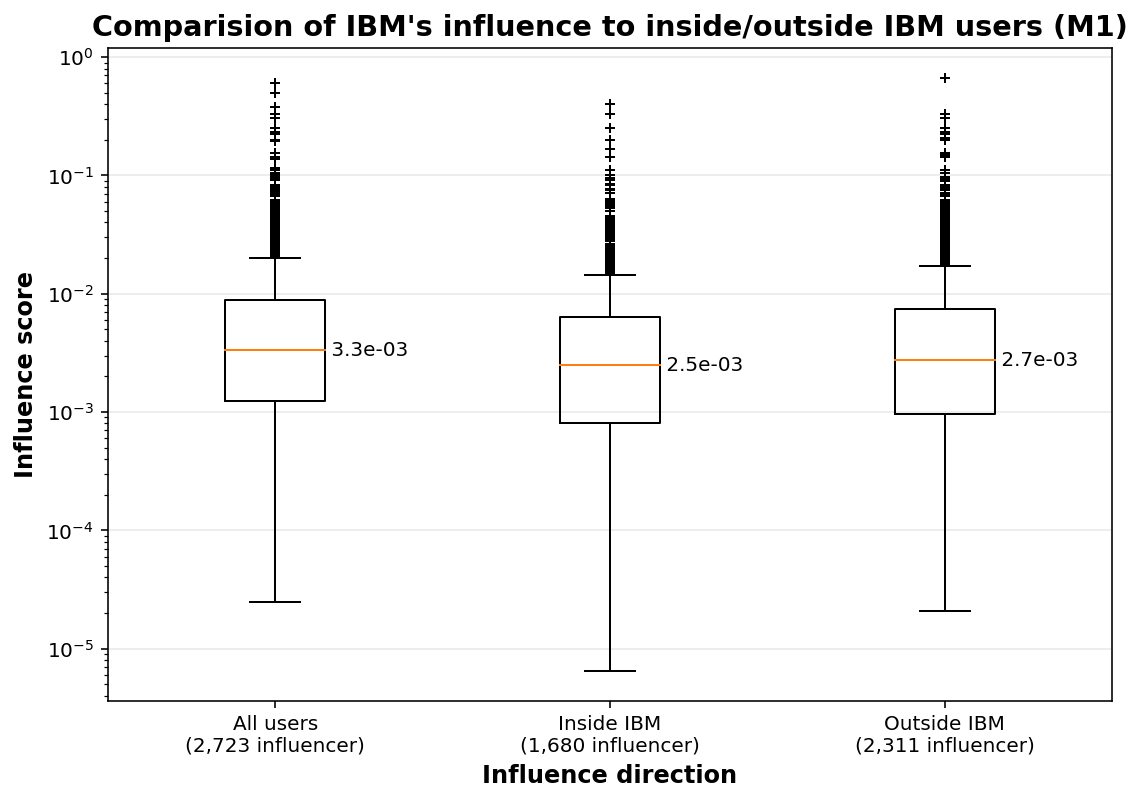

In [25]:
ibm_influence_inout_m1_fig = os.path.join(FIG_DIR, 'ibm_influence_inout_m1.png')
# for affiliation method_1
if 1 == 1:
    '''
    Prepare data
    '''
    df_m1_inside = df_m1[df_m1['ibm_trc'] > 0]
    df_m1_outside = df_m1[df_m1['nonibm_trc'] > 0]
    
    # IBM casts influence to all users
    m1_all_norm_s = df_m1['fo'] * df_m1['all_n']
    m1_all_norm_s.replace(to_replace=0, value=1) # clean 0 values since its denominator
    m1_all_influence = df_m1['all_trc'] / m1_all_norm_s
    
    # IBM casts influence to IBM users (inside)
    m1_inside_norm_s = df_m1_inside['fo'] * df_m1_inside['ibm_n']
    m1_inside_norm_s = m1_inside_norm_s.replace(to_replace=0, value=1) # clean 0 values since its denominator
    m1_inside_influence = df_m1_inside['ibm_trc'] / m1_inside_norm_s
    
    # IBM casts influence to non-IBM users (outside)
    m1_outside_norm_s = df_m1_outside['fo'] * df_m1_outside['nonibm_n']
    m1_outside_norm_s = m1_outside_norm_s.replace(to_replace=0, value=1) # clean 0 values since its denominator
    m1_outside_influence = df_m1_outside['nonibm_trc'] / m1_outside_norm_s

    data = [m1_all_influence, m1_inside_influence, m1_outside_influence]
    
    '''
    Plot
    '''
    fig, ax = plt.subplots(figsize=(9, 6))
    
    bp = plt.boxplot(data, notch=False, sym='k+', vert=True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+', markersize=5)
    
    title_fontdict = {'weight': 'bold', 'size': 'x-large'}
    ax.set_title("Comparision of IBM's influence to inside/outside IBM users (M1)", fontdict=title_fontdict)
    
    label_fontdict = {'weight': 'bold', 'size': 'large'}
    ax.set_xlabel('Influence direction', fontdict=label_fontdict)
    ax.set_ylabel('Influence score', fontdict=label_fontdict)
    ax.set_xticklabels(['All users\n(2,723 influencer)', 'Inside IBM\n(1,680 influencer)', 'Outside IBM\n(2,311 influencer)'])
    ax.set_yscale('log')
    
    # add a horizontal grid to the plot, but make it very light in color
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax.set_axisbelow(True)
    
    # add median value text to the median line
    for line in bp['medians']:
        # get position data for median line
        x, y = line.get_xydata()[1] # right point of median line
        # overlay median value
        ax.text(x, y, '{:8.1e}'.format(y), horizontalalignment='left', verticalalignment='center')
    
    '''
    Save figure
    '''
    plt.savefig(ibm_influence_inout_m1_fig, dpi=200)

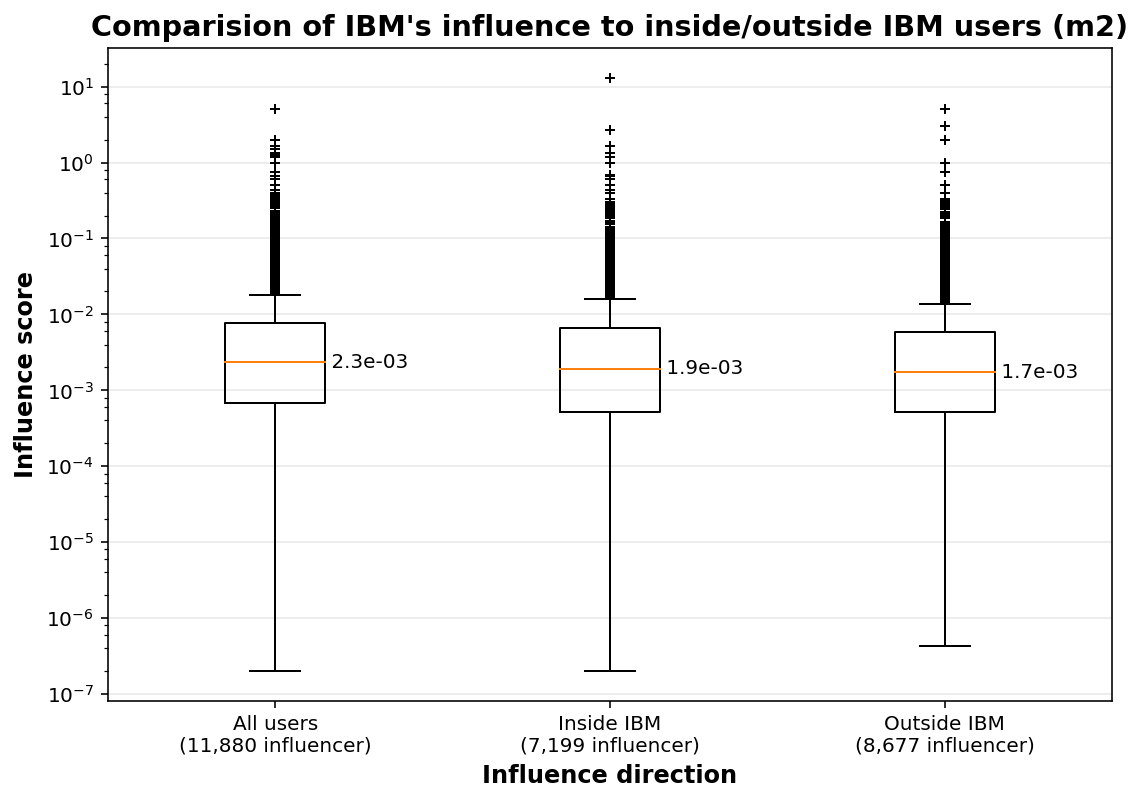

In [30]:
ibm_influence_inout_m2_fig = os.path.join(FIG_DIR, 'ibm_influence_inout_m2.png')
# for affiliation method_2
if 1 == 1:
    '''
    Prepare data
    '''
    df_m2_inside = df_m2[df_m2['ibm_trc'] > 0]
    df_m2_outside = df_m2[df_m2['nonibm_trc'] > 0]
    
    # IBM casts influence to all users
    m2_all_norm_s = df_m2['fo'] * df_m2['all_n']
    m2_all_norm_s.replace(to_replace=0, value=1) # clean 0 values since its denominator
    m2_all_influence = df_m2['all_trc'] / m2_all_norm_s
    
    # IBM casts influence to IBM users (inside)
    m2_inside_norm_s = df_m2_inside['fo'] * df_m2_inside['ibm_n']
    m2_inside_norm_s = m2_inside_norm_s.replace(to_replace=0, value=1) # clean 0 values since its denominator
    m2_inside_influence = df_m2_inside['ibm_trc'] / m2_inside_norm_s
    
    # IBM casts influence to non-IBM users (outside)
    m2_outside_norm_s = df_m2_outside['fo'] * df_m2_outside['nonibm_n']
    m2_outside_norm_s = m2_outside_norm_s.replace(to_replace=0, value=1) # clean 0 values since its denominator
    m2_outside_influence = df_m2_outside['nonibm_trc'] / m2_outside_norm_s

    data = [m2_all_influence, m2_inside_influence, m2_outside_influence]
    
    '''
    Plot
    '''
    fig, ax = plt.subplots(figsize=(9, 6))
    
    bp = plt.boxplot(data, notch=False, sym='k+', vert=True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+', markersize=5)
    
    title_fontdict = {'weight': 'bold', 'size': 'x-large'}
    ax.set_title("Comparision of IBM's influence to inside/outside IBM users (m2)", fontdict=title_fontdict)
    
    label_fontdict = {'weight': 'bold', 'size': 'large'}
    ax.set_xlabel('Influence direction', fontdict=label_fontdict)
    ax.set_ylabel('Influence score', fontdict=label_fontdict)
    ax.set_xticklabels(['All users\n(11,880 influencer)', 'Inside IBM\n(7,199 influencer)', 'Outside IBM\n(8,677 influencer)'])
    ax.set_yscale('log')
    
    # add a horizontal grid to the plot, but make it very light in color
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax.set_axisbelow(True)
    
    # add median value text to the median line
    for line in bp['medians']:
        # get position data for median line
        x, y = line.get_xydata()[1] # right point of median line
        # overlay median value
        ax.text(x, y, '{:8.1e}'.format(y), horizontalalignment='left', verticalalignment='center')
    
    '''
    Save figure
    '''
    plt.savefig(ibm_influence_inout_m2_fig, dpi=200)